# Linear regression with multiple variables

Demonstration of linear regression with mutliple variables, by predicting average house prices based on various features of houses.

In [1]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import math

## Load data

In [2]:
# Boston house price dataset
# http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset
houses = datasets.load_boston()

In [3]:
houses.data.shape

(506, 13)

There are 506 examples, each with 13 features:

```	
CRIM per capita crime rate by town
ZN proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS proportion of non-retail business acres per town
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX nitric oxides concentration (parts per 10 million)
RM average number of rooms per dwelling
AGE proportion of owner-occupied units built prior to 1940
DIS weighted distances to five Boston employment centres
RAD index of accessibility to radial highways
TAX full-value property-tax rate per $10,000
PTRATIO pupil-teacher ratio by town
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT % lower status of the population
```

In [4]:
features = houses.feature_names
X = houses.data # the 13 features
y = houses.target # average house price ($10,000), our target variable

## Explore and clean data

We discovered in "Linear regression with one variable" that there are some exampels with an artificial value of exactly $500,000 (see that notebook for more details). Let's remove these from the data.

In [5]:
# Remove examples with price of exactly $500,000
to_remove = np.argwhere(y==50)
y = np.delete(y, to_remove)
X = np.delete(X, to_remove, axis=0)

Let's see how average house price correlates with each feature.

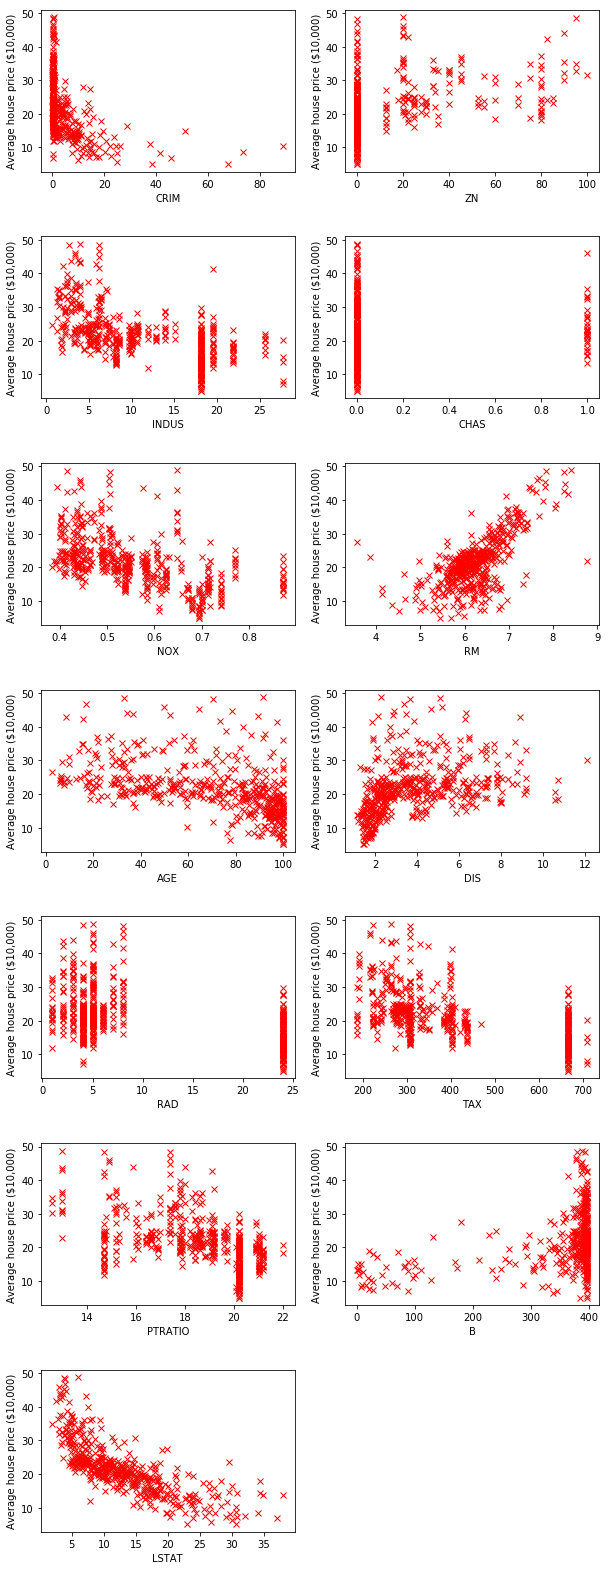

In [6]:
display_cols = 2
display_rows = math.ceil(len(features) / 2)
plt.figure(figsize=(10, display_rows*4))

for i in range(len(features)):
    plt.subplot(display_rows, display_cols, i+1)
    plt.plot(X[:, i], y, 'rx')
    plt.ylabel('Average house price ($10,000)')
    plt.xlabel(features[i])

plt.subplots_adjust(hspace=0.4)
plt.show()

We can see that CHAS is not a useful predictor of average house price, so we'll remove this feature.

In [7]:
X = np.delete(X, 3, axis=1)
features = np.delete(features, 3)

At this point it might be possible to do some feature engineering, but let's see how things turn out with the features as they are.

In [8]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# LinearRegression() requires 2D arrays
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]

## Train and test linear regression

In [10]:
# Train
model = linear_model.LinearRegression(normalize=True)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [11]:
# Test
y_pred = model.predict(X_test)

In [12]:
# Quantify performance
print('Performance metrics:')
print('\tMedian absolute error: $%.0f.' % (median_absolute_error(y_test, y_pred)*1e4))
print('\tR2 score: %.2f.' % (r2_score(y_test, y_pred)))

Performance metrics:
	Median absolute error: $21799.
	R2 score: 0.77.


Performance metrics change every time the notebook is executed due to the ranmdon train-test-split and the small size of the dataset; R2 score seems to vary between approximately 0.7-0.8. We could attain more consistent results if we had more data.

We can visualise our performance by plotting predicted price against real price (a perfect set of predictions would give us a straight line with a gradient of 1.0).

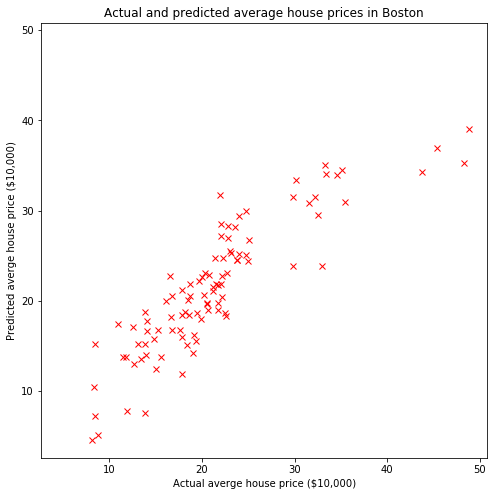

In [13]:
# Visualise performance
plt.figure(figsize=(8, 8))
plt.plot(y_test, y_pred, 'rx')
plt.xlabel('Actual averge house price ($10,000)')
plt.ylabel('Predicted averge house price ($10,000)')

# Plot on square axes
max_price = max(max(y_pred), max(y_test)) + 2
min_price = min(min(y_pred), min(y_test)) - 2
plt.xlim(min_price, max_price)
plt.ylim(min_price, max_price)

plt.title('Actual and predicted average house prices in Boston')
plt.show()